In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('Nutrition__Physical_Activity__and_Obesity_-_Behavioral_Risk_Factor_Surveillance_System')

In [3]:
df.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Topic,Question,Data_Value_Type,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,Total,Age(years),Education,Gender,Income,Race/Ethnicity,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1,Class
0,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,Value,32.0,30.5,33.5,7304.0,Total,NaN,NaN,NaN,NaN,NaN,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1.0,Total,Total,OVR,OVERALL,Obesity / Weight Status
1,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,Value,32.3,29.9,34.7,2581.0,NaN,NaN,NaN,Male,NaN,NaN,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1.0,Gender,Male,GEN,MALE,Obesity / Weight Status
2,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,Value,31.8,30.0,33.6,4723.0,NaN,NaN,NaN,Female,NaN,NaN,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1.0,Gender,Female,GEN,FEMALE,Obesity / Weight Status
3,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,Value,33.6,29.9,37.6,1153.0,NaN,NaN,Less than high school,NaN,NaN,NaN,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1.0,Education,Less than high school,EDU,EDUHS,Obesity / Weight Status
4,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,Value,32.8,30.2,35.6,2402.0,NaN,NaN,High school graduate,NaN,NaN,NaN,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1.0,Education,High school graduate,EDU,EDUHSGRAD,Obesity / Weight Status


In [4]:
df1=pd.read_csv('Nutrition__Physical_Activity__and_Obesity_-_Behavioral_Risk_Factor_Surveillance_System')

In [5]:
df.isnull().sum()

YearStart                        0
YearEnd                          0
LocationAbbr                     0
LocationDesc                     0
Datasource                       0
Topic                            0
Question                         0
Data_Value_Type                  0
Data_Value                       0
Low_Confidence_Limit             0
High_Confidence_Limit            0
Sample_Size                      0
Total                        50544
Age(years)                   41530
Education                    45592
Gender                       49029
Income                       39123
Race/Ethnicity               42220
GeoLocation                   1057
ClassID                          0
TopicID                          0
QuestionID                       0
DataValueTypeID                  0
LocationID                       0
StratificationCategory1          0
Stratification1                  0
StratificationCategoryId1        0
StratificationID1                0
Class               

In [6]:
df.shape

(52345, 29)

In [7]:
df.describe()

,YearStart,YearEnd,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,LocationID
count,52345.000000,52345.000000,52345.000000,52345.000000,52345.000000,52345.000000,52345.000000
mean,2012.321081,2012.321081,31.356217,27.114031,36.155544,4021.174215,29.698182
std,1.101964,1.101964,9.797423,9.590796,10.806611,20315.596445,16.042853
min,2011.000000,2011.000000,0.900000,0.300000,3.000000,50.000000,1.000000
25%,2011.000000,2011.000000,24.382296,20.300000,28.400000,598.000000,16.820943
50%,2013.000000,2013.000000,31.128517,26.900000,36.000000,1263.000000,29.768057
75%,2013.000000,2013.000000,37.423078,33.333449,42.600000,2592.000000,42.619025
max,2014.000000,2014.000000,75.300000,69.500000,87.700000,475078.000000,73.509261


In [8]:
df.drop(columns=['Total','Age(years)','Education','Gender','Income','Race/Ethnicity','GeoLocation','YearStart','YearEnd','LocationAbbr','LocationDesc','Datasource','Topic','Question','ClassID','TopicID','QuestionID','DataValueTypeID','LocationID'],inplace=True)

In [68]:
df1.drop(columns=['Total','Age(years)','Education','Gender','Income','Race/Ethnicity','GeoLocation','YearStart','YearEnd','LocationAbbr','LocationDesc','Datasource','Topic','Question','ClassID','TopicID','QuestionID','DataValueTypeID','LocationID'],inplace=True)

In [10]:
df.head()

,Data_Value_Type,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1,Class
0,Value,32.0,30.5,33.5,7304.0,Total,Total,OVR,OVERALL,Obesity / Weight Status
1,Value,32.3,29.9,34.7,2581.0,Gender,Male,GEN,MALE,Obesity / Weight Status
2,Value,31.8,30.0,33.6,4723.0,Gender,Female,GEN,FEMALE,Obesity / Weight Status
3,Value,33.6,29.9,37.6,1153.0,Education,Less than high school,EDU,EDUHS,Obesity / Weight Status
4,Value,32.8,30.2,35.6,2402.0,Education,High school graduate,EDU,EDUHSGRAD,Obesity / Weight Status


In [11]:
df.isnull().any()

Data_Value_Type              False
Data_Value                   False
Low_Confidence_Limit         False
High_Confidence_Limit        False
Sample_Size                  False
StratificationCategory1      False
Stratification1              False
StratificationCategoryId1    False
StratificationID1            False
Class                        False
dtype: bool

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

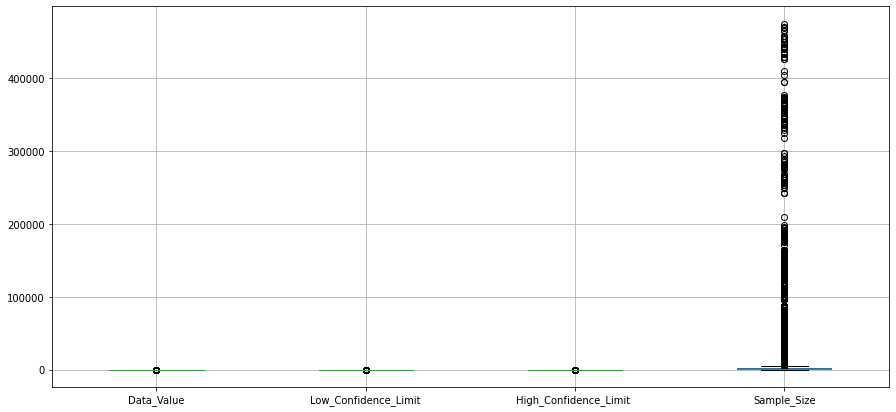

In [13]:
plt.figure(figsize=(15,7))
df.boxplot()
plt.show()

In [14]:
df2=df.iloc[:,[1,2,3]]

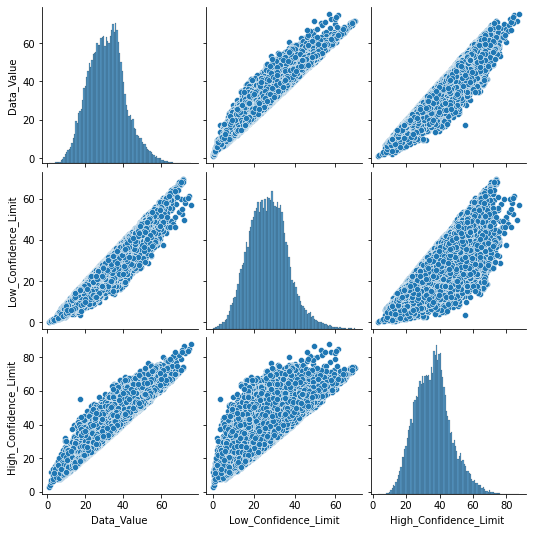

In [15]:
import seaborn as sns
sns.pairplot(df2)

In [16]:
df.head()

,Data_Value_Type,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1,Class
0,Value,32.0,30.5,33.5,7304.0,Total,Total,OVR,OVERALL,Obesity / Weight Status
1,Value,32.3,29.9,34.7,2581.0,Gender,Male,GEN,MALE,Obesity / Weight Status
2,Value,31.8,30.0,33.6,4723.0,Gender,Female,GEN,FEMALE,Obesity / Weight Status
3,Value,33.6,29.9,37.6,1153.0,Education,Less than high school,EDU,EDUHS,Obesity / Weight Status
4,Value,32.8,30.2,35.6,2402.0,Education,High school graduate,EDU,EDUHSGRAD,Obesity / Weight Status


In [17]:
df['Data_Value_Type'].unique()

array(['Value'], dtype=object)

In [18]:
df.drop(columns=['Data_Value_Type'],inplace=True)

# Frequency encoding


In [19]:
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()

In [69]:
df['StratificationCategory1']=l.fit_transform(df['StratificationCategory1'])
df1['StratificationCategory1']=l.fit_transform(df1['StratificationCategory1'])


In [70]:
df['StratificationCategoryId1']=l.fit_transform(df['StratificationCategoryId1'])
df1['StratificationCategoryId1']=l.fit_transform(df1['StratificationCategoryId1'])



In [71]:
df['Class']=l.fit_transform(df['Class'])
df1['Class']=l.fit_transform(df1['Class'])



In [72]:
frequency=df['Stratification1'].value_counts().to_dict()
frequency1=df1['Stratification1'].value_counts().to_dict()


In [24]:
frequency

{'$15,000 - $24,999': 2041,
 '$25,000 - $34,999': 1990,
 '$35,000 - $49,999': 1992,
 '$50,000 - $74,999': 2010,
 '$75,000 or greater': 1801,
 '18 - 24': 2070,
 '2 or more races': 1829,
 '25 - 34': 1902,
 '35 - 44': 1989,
 '45 - 54': 1988,
 '55 - 64': 1984,
 '65 or older': 2105,
 'American Indian/Alaska Native': 1324,
 'Asian': 1256,
 'College graduate': 1886,
 'Data not reported': 2208,
 'Female': 2103,
 'Hawaiian/Pacific Islander': 78,
 'High school graduate': 2180,
 'Hispanic': 2046,
 'Less than $15,000': 2195,
 'Less than high school': 2050,
 'Male': 2167,
 'Non-Hispanic Black': 1624,
 'Non-Hispanic White': 2159,
 'Other': 756,
 'Some college or technical school': 2223,
 'Total': 2389}

In [73]:
df1['Stratification1']=df1['Stratification1'].map(frequency1)

In [74]:
df['Stratification1']=df['Stratification1'].map(frequency)

In [75]:
freq1=df1['StratificationID1'].value_counts().to_dict()

In [76]:
freq=df['StratificationID1'].value_counts().to_dict()

In [77]:
df1['StratificationID1']=df1['StratificationID1'].map(freq1)

In [78]:
df['StratificationID1']=df['StratificationID1'].map(freq)

In [31]:
df.head()

,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1,Class
0,32.0,30.5,33.5,7304.0,5,2389,4,2332,1
1,32.3,29.9,34.7,2581.0,2,2167,2,2110,1
2,31.8,30.0,33.6,4723.0,2,2103,2,2095,1
3,33.6,29.9,37.6,1153.0,1,2050,1,1935,1
4,32.8,30.2,35.6,2402.0,1,2180,1,2108,1


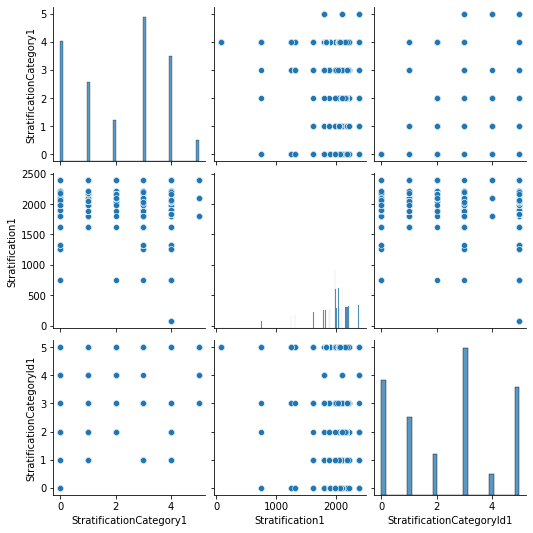

In [32]:
df3=df.iloc[:,[4,5,6]]
sns.pairplot(df3)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


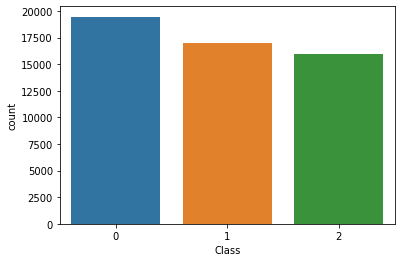

In [33]:
sns.countplot(df['Class'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


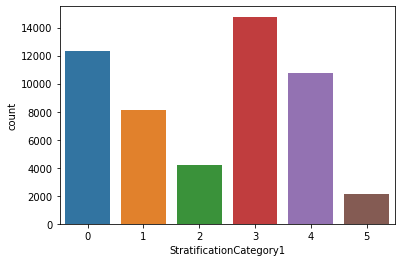

In [34]:
sns.countplot(df['StratificationCategory1'])

In [35]:
dd=pd.read_csv('Nutrition__Physical_Activity__and_Obesity_-_Behavioral_Risk_Factor_Surveillance_System')

In [36]:
dd.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Topic,Question,Data_Value_Type,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,Total,Age(years),Education,Gender,Income,Race/Ethnicity,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1,Class
0,2016,2016,US,National,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,Value,34.9,35.5,438479.0,Total,NaN,NaN,NaN,NaN,NaN,NaN,OWS,OWS1,Q037,VALUE,59.0,Total,Total,OVR,OVERALL,Obesity / Weight Status
1,2016,2016,US,National,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,Value,40.6,41.5,198440.0,NaN,NaN,NaN,Male,NaN,NaN,NaN,OWS,OWS1,Q037,VALUE,59.0,Gender,Male,GEN,MALE,Obesity / Weight Status
2,2016,2016,US,National,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,Value,28.9,29.7,240000.0,NaN,NaN,NaN,Female,NaN,NaN,NaN,OWS,OWS1,Q037,VALUE,59.0,Gender,Female,GEN,FEMALE,Obesity / Weight Status
3,2016,2016,US,National,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,Value,33.6,35.7,32325.0,NaN,NaN,Less than high school,NaN,NaN,NaN,NaN,OWS,OWS1,Q037,VALUE,59.0,Education,Less than high school,EDU,EDUHS,Obesity / Weight Status
4,2016,2016,US,National,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,Value,33.7,34.8,123241.0,NaN,NaN,High school graduate,NaN,NaN,NaN,NaN,OWS,OWS1,Q037,VALUE,59.0,Education,High school graduate,EDU,EDUHSGRAD,Obesity / Weight Status


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


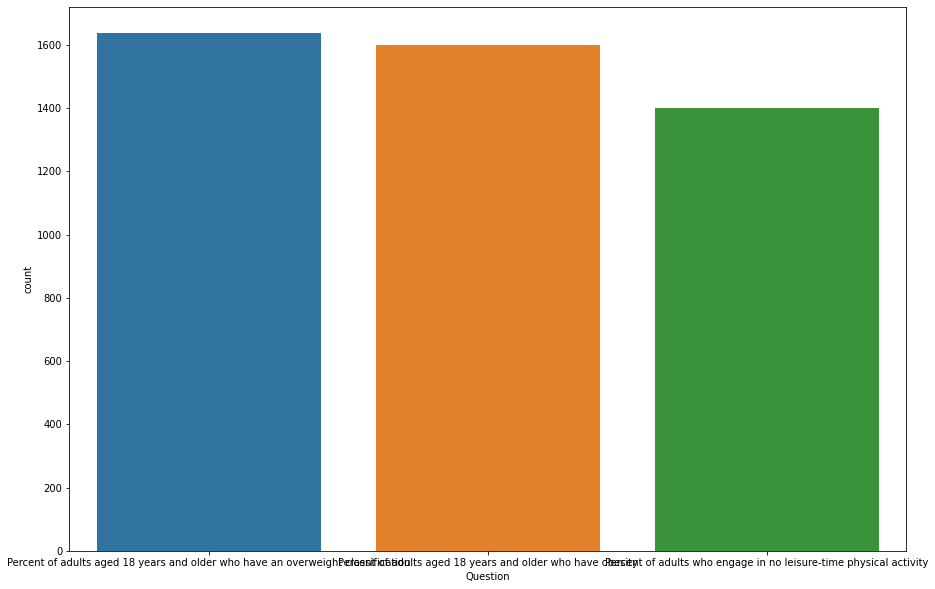

In [37]:
plt.figure(figsize=(15,10))
sns.countplot(dd['Question'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


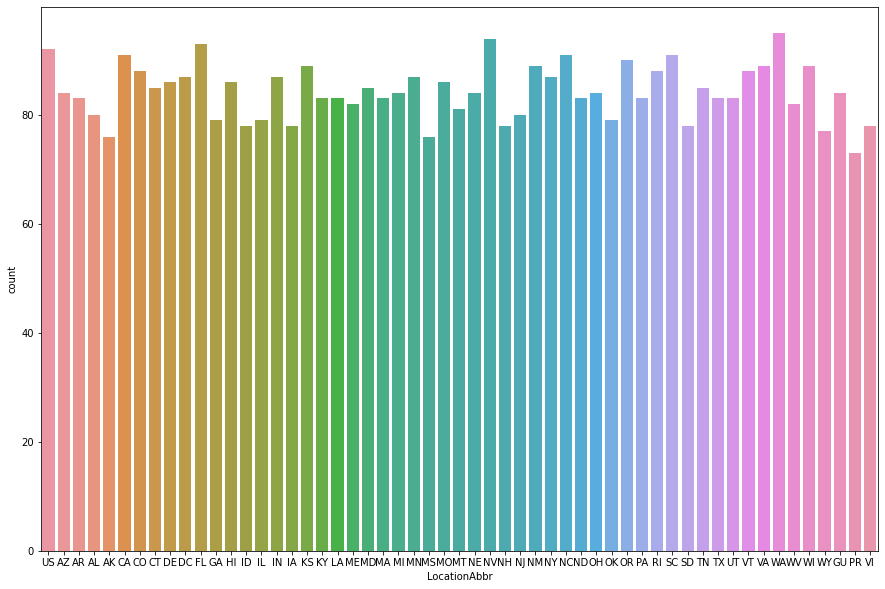

In [38]:
plt.figure(figsize=(15,10))
sns.countplot(dd['LocationAbbr'])
plt.show()

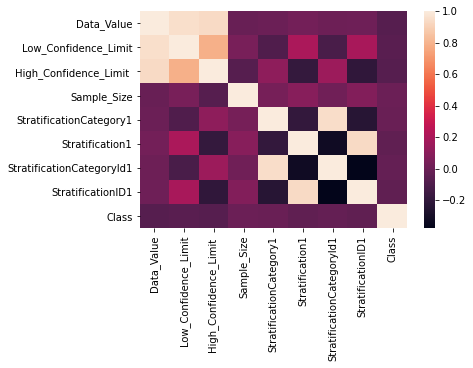

In [39]:
sns.heatmap(df.corr())

In [40]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

In [41]:
x=df.iloc[:,[1,2,3,4,5,6,7,8]].values
x

array([[3.05000000e+01, 3.35000000e+01, 7.30400000e+03, ...,
        4.00000000e+00, 2.33200000e+03, 1.00000000e+00],
       [2.99000000e+01, 3.47000000e+01, 2.58100000e+03, ...,
        2.00000000e+00, 2.11000000e+03, 1.00000000e+00],
       [3.00000000e+01, 3.36000000e+01, 4.72300000e+03, ...,
        2.00000000e+00, 2.09500000e+03, 1.00000000e+00],
       ...,
       [9.61752018e+00, 3.61326571e+01, 5.51394524e+01, ...,
        5.00000000e+00, 1.24200000e+03, 0.00000000e+00],
       [4.03135004e+01, 6.44464131e+01, 1.30535869e+02, ...,
        5.00000000e+00, 1.98900000e+03, 0.00000000e+00],
       [1.57517154e+01, 1.85846887e+01, 5.81900000e+03, ...,
        2.00000000e+00, 2.09500000e+03, 0.00000000e+00]])

In [42]:
y=df.iloc[:,[0]].values

In [43]:
y


array([[32.        ],
       [32.3       ],
       [31.8       ],
       ...,
       [19.67568445],
       [52.53923942],
       [17.16270647]])

In [44]:
x=ss.fit_transform(x)

In [45]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.3)

## Linear Regression

In [46]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [47]:
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [48]:
from sklearn.metrics import mean_squared_error


In [49]:
pr=lr.predict(x_test)

In [50]:
import numpy as np

In [51]:
np.sqrt(mean_squared_error(pr,y_test))

0.3458906109324253

## Lightgbm

In [52]:
import lightgbm

In [53]:
lg=lightgbm.LGBMRegressor()

In [54]:
lg.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [55]:
plg=lg.predict(x_test)

In [56]:
np.sqrt(mean_squared_error(plg,y_test))


0.22676711535071792

## Random Forest Regressor

In [57]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()

In [58]:
rf.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [59]:
pf=rf.predict(x_test)

In [60]:
np.sqrt(mean_squared_error(pf,y_test))


0.09741737253713684

## XgBoost

In [61]:
import xgboost

In [62]:
xgb=xgboost.XGBRegressor()

In [63]:
xgb.fit(x_train,y_train)

[13:18:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [64]:
xg=xgb.predict(x_test)

In [65]:
np.sqrt(mean_squared_error(xg,y_test))

0.3110184976194629

## predicting on test data

In [66]:
df1=pd.read_csv('/content/Test_data (1).csv')

In [79]:
df1.head()

,Data_Value_Type,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1,Class
0,Value,34.9,35.5,438479.0,5,205,4,198,0
1,Value,40.6,41.5,198440.0,2,176,2,174,0
2,Value,28.9,29.7,240000.0,2,184,2,182,0
3,Value,33.6,35.7,32325.0,1,190,1,189,0
4,Value,33.7,34.8,123241.0,1,189,1,190,0


In [80]:
df1.describe()

,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1,Class
count,4636.000000,4636.000000,4636.000000,4636.000000,4636.000000,4636.000000,4636.000000,4636.000000
mean,25.917650,34.969354,3842.453312,2.176661,176.393443,2.349008,176.240725,0.301769
std,7.745270,8.867827,19512.345589,1.600453,23.769290,1.813488,23.355982,0.459075
min,0.600000,7.900000,50.000000,0.000000,15.000000,0.000000,15.000000,0.000000
25%,20.900000,29.900000,513.000000,1.000000,176.000000,1.000000,175.000000,0.000000
50%,27.100000,36.000000,1110.500000,3.000000,181.000000,3.000000,182.000000,0.000000
75%,31.601578,40.500000,2513.250000,3.000000,185.000000,3.000000,187.000000,1.000000
max,48.500000,75.300000,476876.000000,5.000000,205.000000,5.000000,198.000000,1.000000


In [81]:
df1.isnull().any()

Data_Value_Type              False
Low_Confidence_Limit         False
High_Confidence_Limit        False
Sample_Size                  False
StratificationCategory1      False
Stratification1              False
StratificationCategoryId1    False
StratificationID1            False
Class                        False
dtype: bool

In [82]:
x1=df1.iloc[:,[1,2,3,4,5,6,7,8]].values

In [87]:
x1=ss.fit_transform(x1)

In [88]:
predicted=lr.predict(x1)

In [89]:
predicted

array([[37.46523381],
       [45.08903349],
       [30.29556359],
       ...,
       [31.20724205],
       [47.64126152],
       [34.49859081]])